In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")
df
                 

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

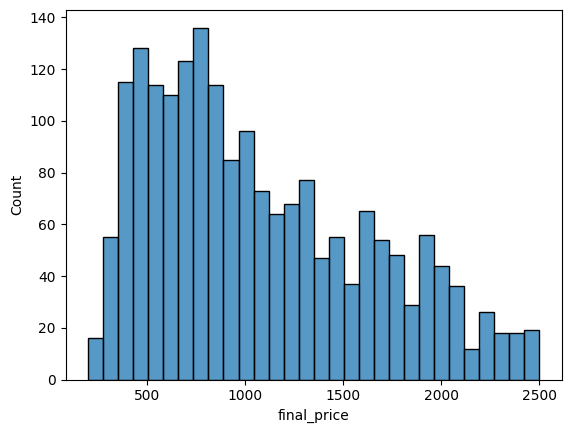

In [6]:
sns.histplot(df.final_price[df.final_price <= 2500] , bins = 30)

In [7]:
df.isnull().sum()  ## Q1 : Screen

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [8]:
df.ram.median()  ## Q2 : 16

np.float64(16.0)

In [9]:
L = ['ram',
'storage',
'screen',
'final_price']
df = df[L]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [10]:
n = len(df)
n_test =int( 0.2 * n )
n_val = int (0.2 * n )
n_train = n - n_test - n_val
print(n,n_train,n_val,n_test)

2160 1296 432 432


In [11]:
indexes = np.arange(n)
indexes

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [12]:

    
np.random.seed(42)
np.random.shuffle(indexes)
indexes

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [13]:
df_train = df.iloc[indexes[:n_train]]
df_val = df.iloc[indexes[n_train : n_train + n_val]]
df_test = df.iloc[indexes[ n_train + n_val : ]]

In [14]:
df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [15]:
X_train_fillzero = df_train[['ram',
'storage',
'screen']].fillna(0).values
y_train = df_train.final_price.values
y_train.shape

(1296,)

In [16]:
def linear_regression(X,y,r) : 
    X_new = np.column_stack((np.ones(X.shape[0]),X))
    XTX = X_new.T.dot(X_new)
    XTX += r*np.eye(XTX.shape[0])
    w = np.linalg.inv(XTX).dot(X_new.T).dot(y)
    return w

In [17]:
w = linear_regression(X_train_fillzero,y_train,0)
X_val = df_val[['ram',
'storage',
'screen']].fillna(0)
X_val = np.column_stack((np.ones(X_val.shape[0]),X_val))
y_val = df_val.final_price.values
def rmse(y1,y2) :
    n = len(y1)
    error = y1-y2
    se = error**2
    mse = se.mean()
    return round(np.sqrt(mse), 2)
rmse(y_val,X_val.dot(w)) 

np.float64(597.36)

In [18]:

X_train_fillmean = df_train[['ram',
'storage',
'screen']].fillna(df_train.screen.mean()).values
y_train = df_train.final_price.values
X_train_fillmean

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [19]:
w = linear_regression(X_train_fillmean,y_train,0)
rmse(y_val,X_val.dot(w)) 

np.float64(597.74)

In [20]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100] :
    w = linear_regression(X_train_fillzero,y_train,r)
    print( r , rmse(y_val,X_val.dot(w)) )
    

0 597.36
0.01 597.36
0.1 597.35
1 597.21
5 597.01
10 597.06
100 597.9


In [21]:
result = list()
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(seed)
    indexes = np.arange(n)
    np.random.shuffle(indexes)
    df_train = df.iloc[indexes[:n_train]]
    df_val = df.iloc[indexes[n_train : n_train + n_val]]
    df_test = df.iloc[indexes[ n_train + n_val : ]]
    X_train_fillzero = df_train[['ram','storage','screen']].fillna(0).values
    w = linear_regression(X_train_fillzero,y_train,0)
    result.append((rmse(y_val,X_val.dot(w))))
    
print(round(np.std(np.array(result)), 3))

    

19.256


In [30]:

for seed in [9]:
    
    np.random.seed(seed)
    indexes = np.arange(n)
    np.random.shuffle(indexes)
    df_train = df.iloc[indexes[:n_train]]
    df_val = df.iloc[indexes[n_train : n_train + n_val]]
    df_test = df.iloc[indexes[ n_train + n_val : ]]
    X_train_full = pd.concat([df_train[['ram','storage','screen']].fillna(0),df_val[['ram','storage','screen']].fillna(0)]).values
    y_val = df_val.final_price.values
    y_train = df_train.final_price.values
    y_train_full = np.concatenate((y_train,y_val))
    y_test = df_test.final_price.values
    X_test = df_test[['ram','storage','screen']].fillna(0).values
    X_test = np.column_stack((np.ones(X_test.shape[0]),X_test))
    w = linear_regression(X_train_full,y_train_full,0.001)
    print(rmse(y_test,X_test.dot(w)))
    



608.61
